# Prosper Loan Data Exploration
## by (Mosta Ashour)

## Preliminary Wrangling

>*  This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and things like that.
>* This data set contains `113,937 loans` with `81 variables` on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# To show the whole columns in the dataset
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
data_path = 'data/3_Loan_data/prosperLoanData.csv'

df = pd.read_csv(data_path)
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### A quick look at the null values in the datasets

In [3]:
# The top columns have null values > 10,000 null values
nulva = df.isnull().sum().sort_values(ascending=False)
nulva[nulva>=1e4]

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPaymentsLessThanOneMonthLate     91852
ProsperPaymentsOneMonthPlusLate         91852
OnTimeProsperPayments                   91852
TotalProsperPaymentsBilled              91852
TotalProsperLoans                       91852
ProsperPrincipalBorrowed                91852
ProsperPrincipalOutstanding             91852
CreditGrade                             84984
ClosedDate                              58848
EstimatedEffectiveYield                 29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedLoss                           29084
dtype: int64

#### A small cleanning to the listingKey column as mentioned in the description it's a unique key for each listing, same value as the 'key' used in the listing object in the API.

In [4]:
# Checking the duplicated in ListinngKey column since it should be unique
print(df.duplicated('ListingKey').sum())

871


In [5]:
# Dropping the duplicates in ListingKey column and checking after dropping
df.drop_duplicates('ListingKey', inplace=True)
print(df.duplicated('ListingKey').sum())

0


In [6]:
# Count the dtype to check the most frequant variables type
df.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

### What is the structure of your dataset?

>* There are **113,937** Loans in the dataset with **81** features. Most variables `(61) are numeric` in nature, `"17" String`, and `"3" bool` with True and False.
>* Each row contains information about each borrower. 

In [7]:
print('''Our data contains {} loans ("After Cleaning") with {} variables on each loan.'''.format(df.shape[0], df.shape[1]))
df.head()

Our data contains 113066 loans ("After Cleaning") with 81 variables on each loan.


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### What is/are the main feature(s) of interest in your dataset?

> #### Because our data have 81 variables and it's unlikely to print them all, by using column_desc below will make it easier to check any column describtion.
> #### We can check the describtion of the main variables below like 
>* LoanStatus
>* Term
>* LoanOriginalAmount
>#### And much more...

In [8]:
def column_desc(x):
    ''' descriping the 'x' column, 
        'x' value could be 'int' the column number between 0-80 
        or 'str' the column name.
    '''
    desc = pd.read_csv('data/3_Loan_data/Prosper_Loan_Data_Variable_Definitions_Sheet1.csv')

    if type(x) == str:
        try:    
            print('Column name:', x, '\n', desc[desc.Variable == x].Description.values[0])
            print(' Number of unique values:', df[x].nunique())
        except: print('Error:===> Invalid column name.')
    elif type(x) == int:
        try: 
            print('Column name:', desc.iloc[x][0], '\n', desc.iloc[x][1])
            print(' Number of unique values:', df.iloc[:, x].nunique())
        except: print('Error:===> Colmun number should be between 0-80')
    else:
        print("Error:===> Invalid column name, column type should be int or str")

In [9]:
column_desc('LoanStatus')

Column name: LoanStatus 
 The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
 Number of unique values: 12


In [10]:
column_desc('Term')

Column name: Term 
 The length of the loan expressed in months.
 Number of unique values: 3


In [11]:
column_desc('LoanOriginalAmount')

Column name: LoanOriginalAmount 
 The origination amount of the loan.
 Number of unique values: 2468


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>* **I'm most interested in figuring out what features are best for predicting the Loan Status in the dataset.**
>* **After checking the data, I've seen that these 15 variables are kind of the way to get better vision of the data, and we can focus our main interest in them.**
>* **There's a list of these features below.**

In [12]:
main_variables = ['Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 
'LenderYield', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                 'LoanOriginationQuarter']

print(len(main_variables))

15


>* **Let's check them description...**

In [13]:
n = 1
for i in main_variables:
    print(n,'-')
    n+=1
    column_desc(i)
    print('')

1 -
Column name: Term 
 The length of the loan expressed in months.
 Number of unique values: 3

2 -
Column name: LoanStatus 
 The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
 Number of unique values: 12

3 -
Column name: ClosedDate 
 Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 
 Number of unique values: 2802

4 -
Column name: BorrowerAPR 
 The Borrower's Annual Percentage Rate (APR) for the loan.
 Number of unique values: 6677

5 -
Column name: BorrowerRate 
 The Borrower's interest rate for this loan. 
 Number of unique values: 2294

6 -
Column name: LenderYield 
 The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
 Number of unique values: 2283

7 -
Column name: ProsperScore 
 A custom risk score built using historical Prosper data. The score ran

## Univariate Exploration

### 1- Let's check first What's the preferred Loan's length in usual?

In [14]:
# check the unique values in Term
df.Term.unique()

array([36, 60, 12], dtype=int64)

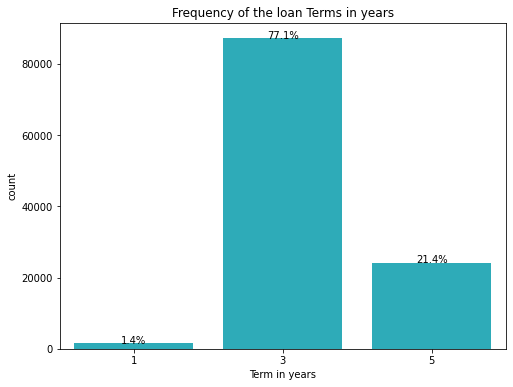

In [15]:
# Adding a new column with the term in years
df['Term_y'] = (df.Term/12).astype(int)
sum_all = df.Term_y.value_counts().sum()
base_color = sb.color_palette()[9]

plt.figure(figsize=(8,6))
sb.countplot(x=df.Term_y, color=base_color);

# Recalculating the type_counts just to have clarity.
type_counts = df.Term_y.value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/sum_all)

    # print the annotation just below the top of the bar
    plt.text(loc,
             count+2,
             pct_string,
             ha = 'center',
             color = 'black')
    
plt.title('Frequency of the loan Terms in years')
plt.xlabel('Term in years');

> * We can see that people tend to choose loans with 3 years length, 3 years length looks perfect for most of people with 77.1% from all our dataset.

### 2- Now let's check the Loan Status "which it's our main interest", What's current status of the loan?

In [16]:
# The description of Loan Status...
column_desc('LoanStatus')

Column name: LoanStatus 
 The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
 Number of unique values: 12


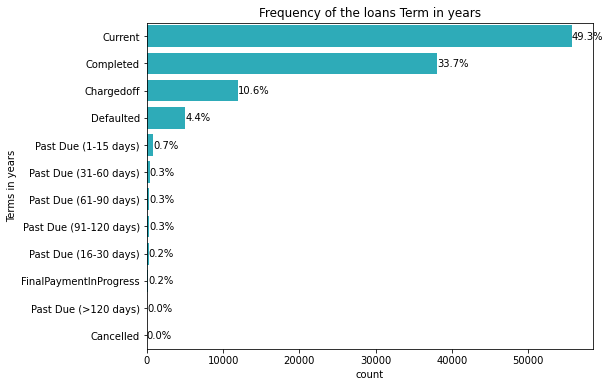

In [17]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[9]
sum_all = df.LoanStatus.value_counts().sum()
type_counts = df.LoanStatus.value_counts()
type_order = df.LoanStatus.value_counts().index


plt.figure(figsize=(8,6))
sb.countplot(data=df, y='LoanStatus', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `LoanStatus` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/sum_all)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1,
             i,
             pct_string,
             va='center')

plt.title('Frequency of the loans Term in years')
plt.ylabel('Terms in years');

* Let's take a deeper look at The **`'Completed'`** and **`'Defaulted'`** status.

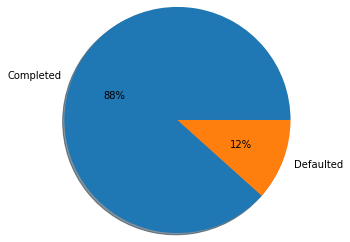

In [18]:
df_ls = df[df.LoanStatus.isin(['Completed', 'Defaulted'])].LoanStatus
labels = list(df_ls.value_counts().index)

plt.pie(df_ls.value_counts(), autopct='%1.0f%%',
        radius=1.3, labels=labels, shadow=True);

* We can see that just **12%** from all borrowers **Defaulted** the loan.
* We could check the reason of this percentage later on...

>* We should focus more in the correlation between if the person completed or Defaulted because of some other variables or not.
>* We'll check this in more details below...

### 3- Let's check next the distribution of BorrowerAPR, BorrowerRate, and LenderYield

In [19]:
def plot2hist(df, x):
    ''' Plotting two hist with different bins number!
        df= the data frame saved in pd.DataFrame()
        x= the column name we want to plot a hist to'''
    
    # Resize the chart, and have two plots side-by-side
    # Set a larger figure size for subplots
    plt.figure(figsize = [10, 5]) 

    # histogram on left, example of too-large bin size
    # 3 row, 2 cols, subplot 1
    plt.subplot(1, 2, 1) 
    bins = np.arange(0, df[x].max()+df[x].mean()/10, np.round(df[x].mean()/4, 2))
    plt.hist(data=df, x=x, bins=bins)
    plt.xlabel(x)
    plt.title("Distribution of "+x);

    # histogram on right, example of too-small bin size
    plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
    sb.histplot(data = df, x = x)
    plt.title("Distribution of "+x+" in too-small bin size")
    plt.show();

>### 1- BorrowerAPR

Column name: BorrowerAPR 
 The Borrower's Annual Percentage Rate (APR) for the loan.
 Number of unique values: 6677


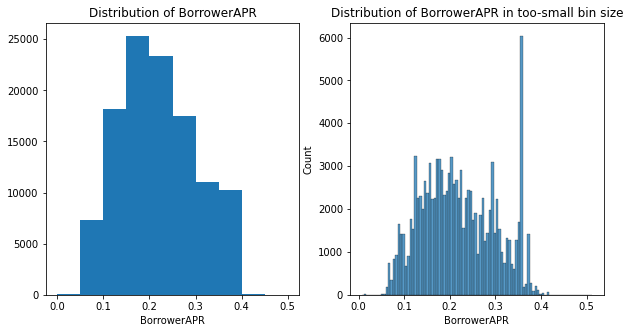

In [20]:
column_desc('BorrowerAPR')
plot2hist(df, 'BorrowerAPR')

>#### 2- BorrowerRate

Column name: BorrowerRate 
 The Borrower's interest rate for this loan. 
 Number of unique values: 2294


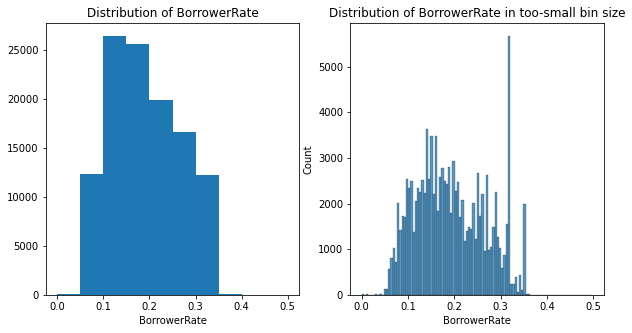

In [21]:
column_desc('BorrowerRate')
plot2hist(df, 'BorrowerRate')

>### 3- LenderYield

Column name: LenderYield 
 The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
 Number of unique values: 2283


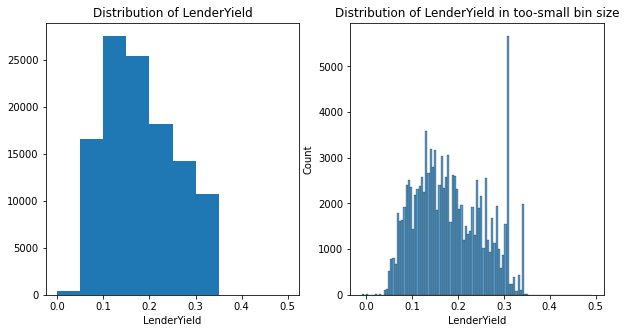

In [22]:
column_desc('LenderYield')
plot2hist(df, 'LenderYield')

>* The three of **BorrowerAPR**, **BorrowerRate**, and **LenderYield** distribution tend to be **symmetric**.
>* The data is roughly **bimodal**

### 4- What's the most frequent occupation selected by the Borrower at the time they created the listing?
>* **Let's check the top 20...**

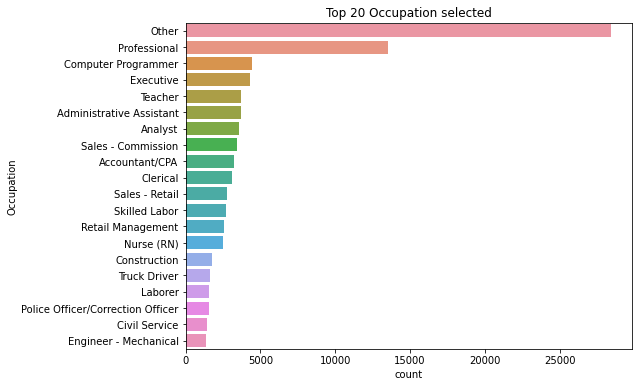

In [23]:
# Choosing the top 20
type_order = df['Occupation'].value_counts().head(20).index
df_top20 = df[df.Occupation.isin(list(type_order))]

plt.figure(figsize=(8,6))
sb.countplot(y='Occupation', data=df_top20, order=type_order)
plt.title("Top 20 Occupation selected");

>* **Let's check now the bottom 20...**

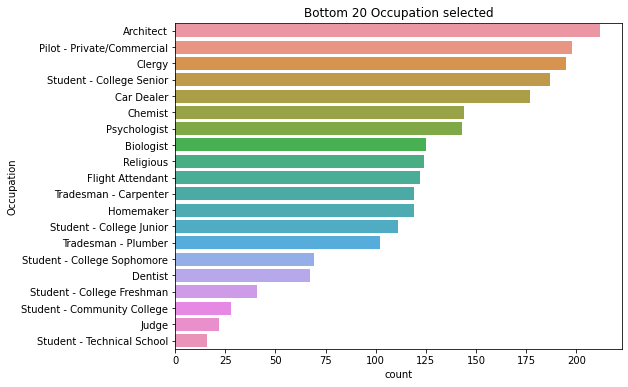

In [24]:
# Choosing the top 20
type_order = df['Occupation'].value_counts().tail(20).index
df_top20 = df[df.Occupation.isin(list(type_order))]

plt.figure(figsize=(8,6))
sb.countplot(y='Occupation', data=df_top20, order=type_order)
plt.title("Bottom 20 Occupation selected");

>* We can see the **most** frequant occupation selected on the top was **Others and Professional**, but we shouldn't put them in our comparision cause they contains variety of occupations. So, we could say that the **most** occupation selected group was the **IT** and people with **fixed jobs**.
>* On the contary, the **less** frequant occupation selected were the **Students group**.

### 5- Let's check the the reasons for asking for loan. What's the most frequant listing that borrower selected?

In [25]:
column_desc('ListingCategory (numeric)')

Column name: ListingCategory (numeric) 
 The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
 Number of unique values: 21


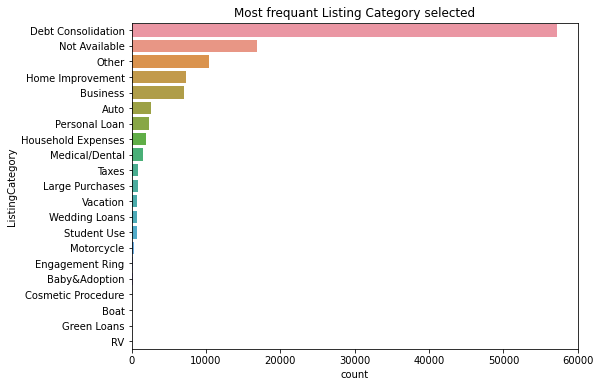

In [26]:
# Converting Listing numbers to its Category's name...
listing_cat = '0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans'
listing = []
for i in listing_cat.split(','):
    listing.append(i.split('-')[1].strip())
listing = pd.Series(listing)

df['ListingCategory'] = pd.Series([listing[i] for i in df['ListingCategory (numeric)'].copy()])
type_order = df.ListingCategory.value_counts().index

plt.figure(figsize=(8,6))
ax = sb.countplot(y= df['ListingCategory'], order=type_order)
plt.title("Most frequant Listing Category selected");

>* **Dept Consoldidation** is the most frequant Category in out list.
>* We can see the people tend to not list the reason of the loan, and we can see that in the second highest frequancy Category **"Not Available"**.
>* However, it shows up that there're some frequent listing Category selected Like **Home improvement** and **Business** are real reasons in Loans.

### 6- I'll move now to the income range.

In [27]:
column_desc('IncomeRange')

Column name: IncomeRange 
 The income range of the borrower at the time the listing was created.
 Number of unique values: 8


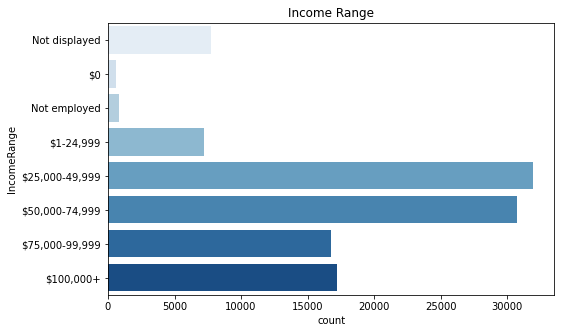

In [28]:
order_type = ['Not displayed','$0', 'Not employed','$1-24,999',
              '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
plt.figure(figsize=(8,5))
sb.countplot(y=df.IncomeRange, palette='Blues', order=order_type)
plt.title("Income Range");

>* Interestingly, it looks like most of the borrowers asking for loan in the middle range of income between 25k and 75k, but still 75k+ still ask for loans and it debends on them work as we saw above in them Occupations. like students won't have income.

### Before closing the section, let's take a look at the loan originated quarter.

In [29]:
column_desc('LoanOriginationQuarter')

Column name: LoanOriginationQuarter 
 The quarter in which the loan was originated.
 Number of unique values: 33


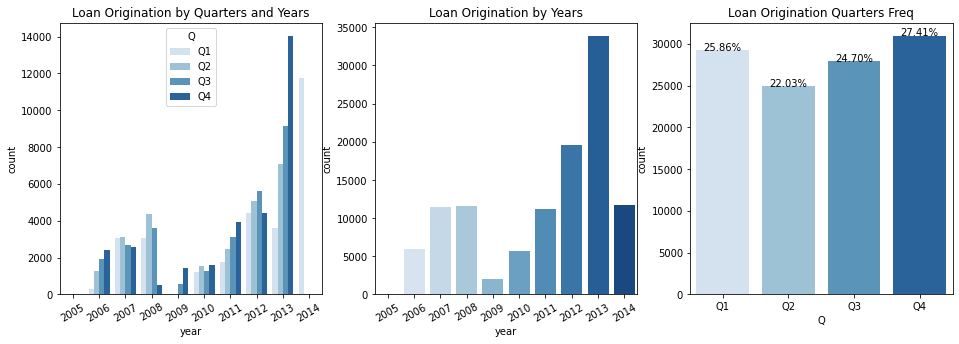

In [30]:
df[['Q', 'year']] = df.LoanOriginationQuarter.str.split(expand=True)

# Resize the chart, and have three plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [16, 5]) 


# histogram on left, 
# 1 row, 3 cols, subplot 1
plt.subplot(1, 3, 1) 
hue_order = ['Q1', 'Q2', 'Q3', 'Q4']
order = list(np.sort(df.year.unique()))
sb.countplot(x='year', hue='Q', data=df, 
             order=order, hue_order=hue_order, palette='Blues')
plt.title("Loan Origination by Quarters and Years")
plt.xticks(rotation=30)
    
    
# histogram on mid,
# 1 row, 3 cols, subplot 1
plt.subplot(1, 3, 2) 
sb.countplot(x='year', data=df, 
             order=order, palette='Blues')
plt.title("Loan Origination by Years")
plt.xticks(rotation=30)


# histogram on right, 
plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 2
ax = sb.countplot(x='Q', data=df, 
             order=hue_order, palette='Blues')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/len(df.ListingCategory)),
            ha="center")
ax.set_title("Loan Origination Quarters Freq");

>* It seems that the distribution of the Loan Origination Quarter left-skewed, and multimodal.
>* The lowest year with loans after 2005 was 2009, loan Origination increasing to the highest year "2013". 
>* People prefer to Originate loans in 'Q4', but with to much low preference **`27,41%`**.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>* The Loan Status have two main status values we would focus more on them, which are 'Completed' and 'Defaulted' status.
>* We have a high percent of Current Status too, Pass Due Status will help us in check what exactly make them to Pass Due.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>* When investigating the Listing Category, the column presents its values as number and each number present type of listing.
>* In investigating the Loan Origination Quarter, the data stored in a string values in shape like 'Q2 2009', I split them to two columns year and Q to be easier to plot and see them distribution.

## Bivariate Exploration

> Let's start with a bigger look at the pairwise correlations present between features in the data.

In [31]:
# Setting our numeric and categorical variables from the main_variables
main_dtype = df[main_variables].dtypes

numeric_vars = list(main_dtype[main_dtype.isin([np.dtype('int64'), np.dtype(float)])].index)
categoric_vars =  list(main_dtype[main_dtype.isin([np.dtype('int64'), np.dtype(float)]) == False].index)

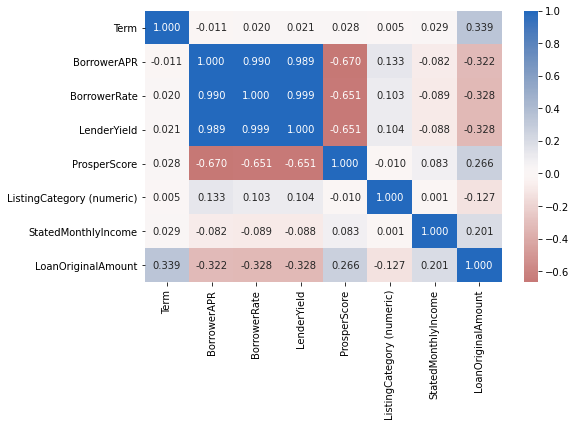

In [32]:
# correlation plot for numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("")
plt.show()

>* As we can see BorrowerAPR, BorrowerRate, and LenderYield are highly correlated with one another, since they present the same value: interest rate in differnt forms.
*But there're no significant relationships between other variables.

C:\Users\Mosta\Anaconda3\envs\ml_ai\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mosta\Anaconda3\envs\ml_ai\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


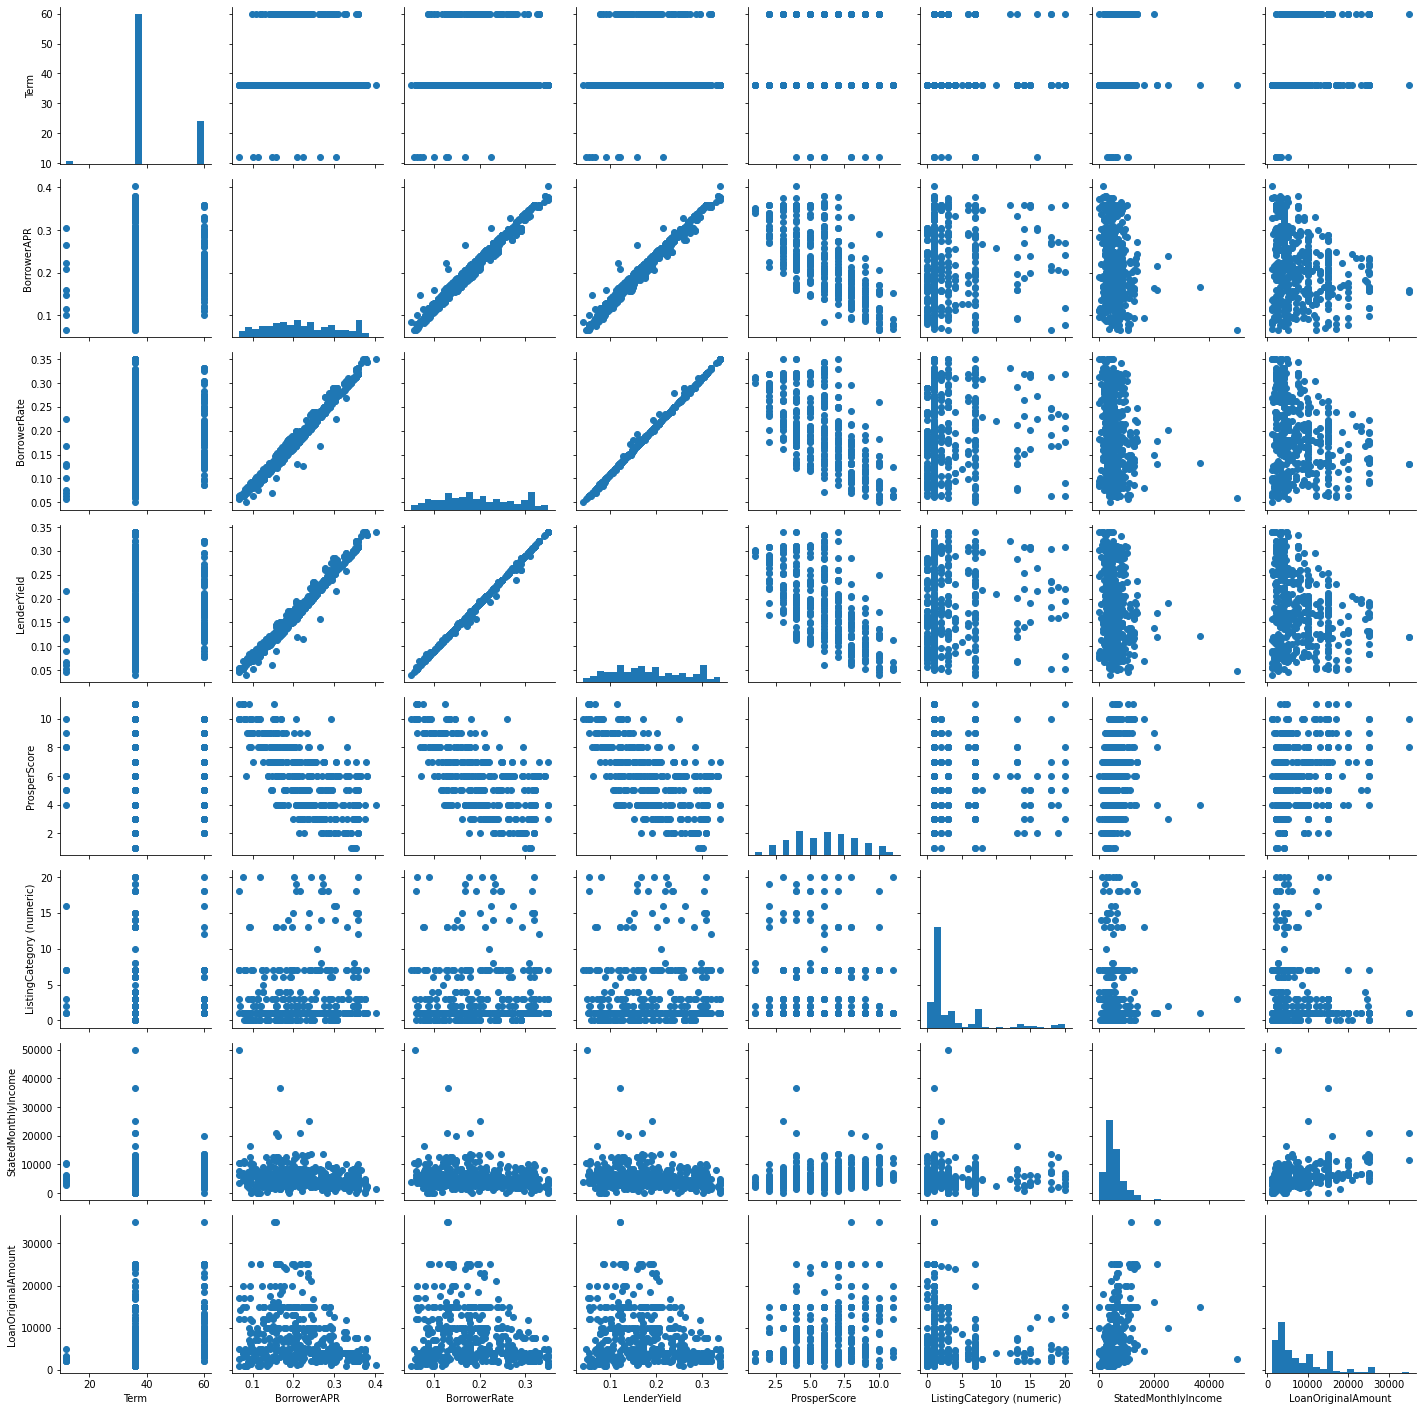

In [33]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
df_samp = df[numeric_vars].sample(500)


g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);

>* We can see the correlation between BorrowerAPR, BorrowerRate, and LenderYield, slightly they're correlated with ProsperScore, but still we can't see a significant relationships between other variables.
*Since our main feature "LoanStatus" is Categorical variable, we will check it in more details below...

### Let's move on to looking at how Loan Status correlate with other variables...

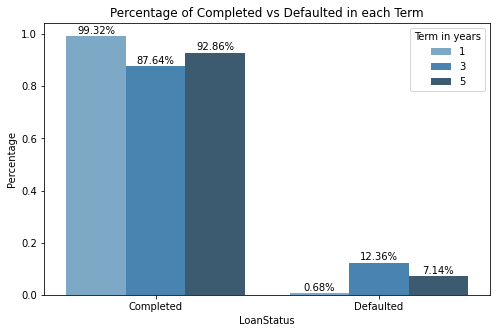

In [34]:
# Let's check the loan status in just these two values 'Completed', 'Defaulted'
df_new = df[df.LoanStatus.isin(['Completed', 'Defaulted'])]
df_new = df_new.groupby(['Term_y']).LoanStatus.value_counts()
df_new = (df_new / df_new.groupby(level=0).sum().rename('perc')).reset_index(name='perc')

# Plotting bar chart for the percentage of each year freq
plt.figure(figsize=(8, 5))
ax = sb.barplot(x="LoanStatus", y="perc", hue='Term_y', data=df_new,
           palette="Blues_d")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{:1.2f}%'.format(height*100),
            ha="center")
ax.legend(title='Term in years')
plt.title("Percentage of Completed vs Defaulted in each Term")
plt.ylabel("Percentage");

* We can see that borrowers with one year Term are almost all Completed them Loans without Defaulted with percentage of 99.32%.
* Three years term was the worst with 12.36% of Defaulted.

### Is there a corrolation of LoanStatus and any of  BorrowerAPR, BorrowerRate, or LenderYield? Let's check this out...

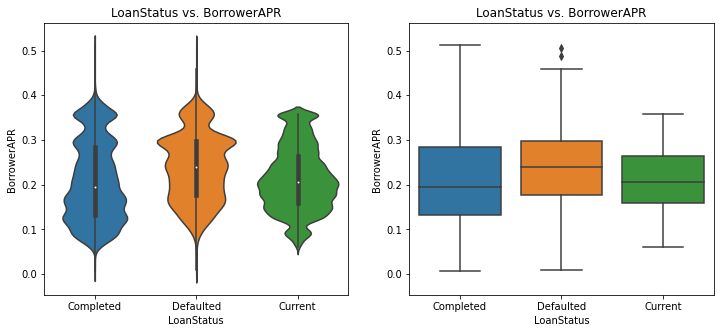

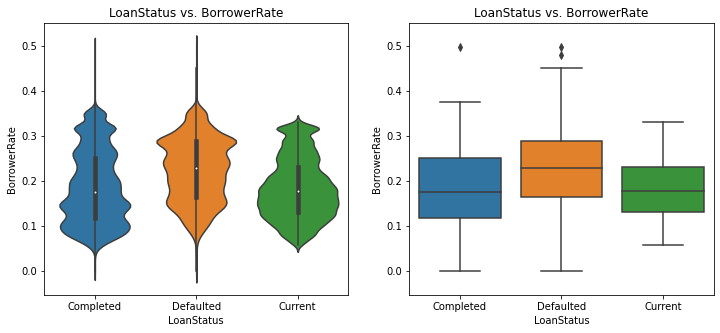

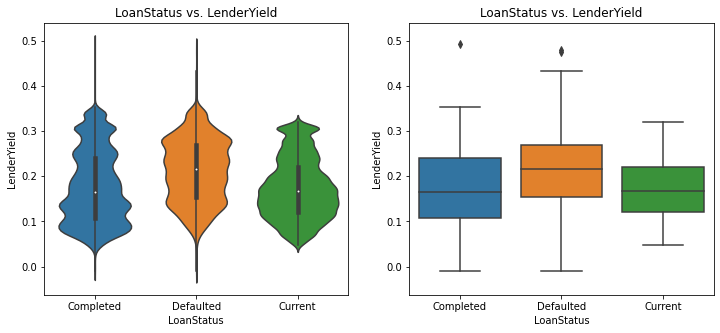

In [35]:
df_new = df[df.LoanStatus.isin(['Completed', 'Defaulted', 'Current'])]
order_status = ['Completed', 'Defaulted', 'Current']

# Step 4.  TWO PLOTS IN ONE FIGURE
for i in ['BorrowerAPR', 'BorrowerRate', 'LenderYield']:
    plt.figure(figsize = [12, 5])
    base_color = sb.color_palette()[9]

    # LEFT plot: violin plot
    plt.subplot(1, 2, 1)
    #Let's return the axes object
    ax1 = sb.violinplot(data=df_new, x='LoanStatus', y=i, order=order_status,
                        innner='quartile')
    plt.title("LoanStatus vs. "+i);

    # RIGHT plot: box plot
    plt.subplot(1, 2, 2)
    sb.boxplot(data=df_new, x='LoanStatus', y=i, order=order_status);
    plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
    plt.title("LoanStatus vs. "+i)
    plt.show()

>* Interestingly, it appears that Defaulted borrowers had a higher median in the three of BorrowerAPR, BorrowerRate, and LenderYield!
>* First and third quartile shows that the more interest rate is high the less borrowers Complete the Loan.
>* Current Status tend to have BorrowerAPR in the range of 0.18 to 0.22, it means a new range of BorrowerAPR than Defaulted and Completed Loans.

LoanStatus with Occupation
LoanStatus with ListingCategory (numeric)
LoanStatus with IncomeRange
LoanStatus with LoanOriginationQuarter
LoanStatus with LoanOriginalAmount

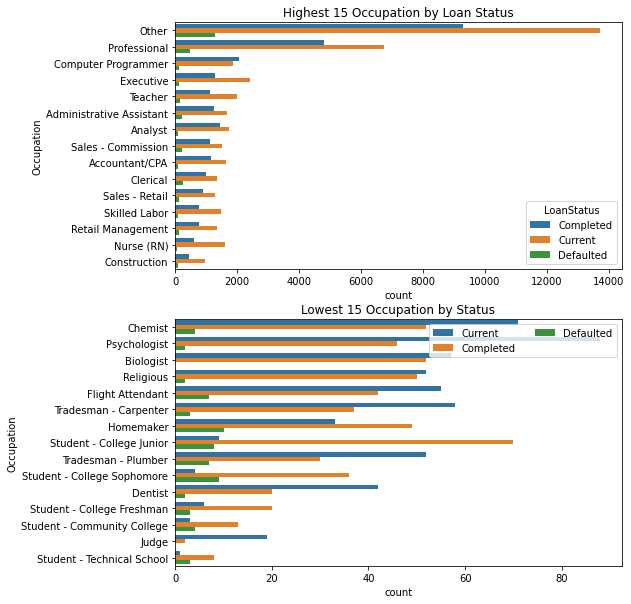

In [36]:
plt.figure(figsize = [8, 10])

# subplot 1: LoanStatus vs Occupation
top15_index = list(df.Occupation.value_counts().head(15).index)
df_top15 = df_new[df_new.Occupation.isin(top15_index)]
plt.subplot(2, 1, 1)
sb.countplot(data=df_top15, y='Occupation', hue = 'LoanStatus', order=top15_index)
plt.title("Highest 15 Occupation by Loan Status")

# subplot 2: LoanStatus vs. Occupation, use different color palette
bot15_index = list(df.Occupation.value_counts().tail(15).index)
df_bot15 = df_new[df_new.Occupation.isin(bot15_index)]
ax = plt.subplot(2, 1, 2)
sb.countplot(data=df_bot15, y='Occupation', hue = 'LoanStatus', order=bot15_index)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title("Lowest 15 Occupation by Status");

>* There doesn't seem to be that much interaction between Occupation and the Loan Status.

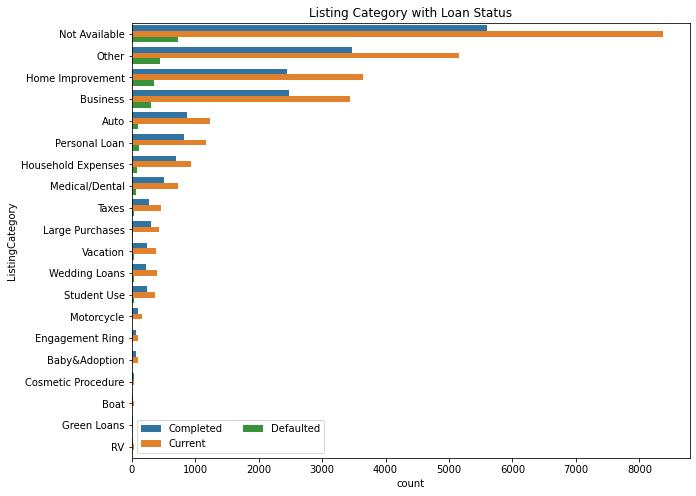

In [37]:
plt.figure(figsize = [10, 8])

#subplot 1: ListingCategory vs. LoanStatus
order_type = list(df_new[df_new.ListingCategory!='Debt Consolidation'].ListingCategory.value_counts().index)
ax = plt.subplot(1, 1, 1)
sb.countplot(data = df_new[df_new.ListingCategory!='Debt Consolidation'], y='ListingCategory', hue = 'LoanStatus',
             order=order_type)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.title("Listing Category with Loan Status")
plt.show()

>* It doesn't seem to be that much interaction between Loan Status and Listing too.
### Finally let's check if there's a corrolation between LoanStatus and IncomeRange or LoanOriginalAmount...

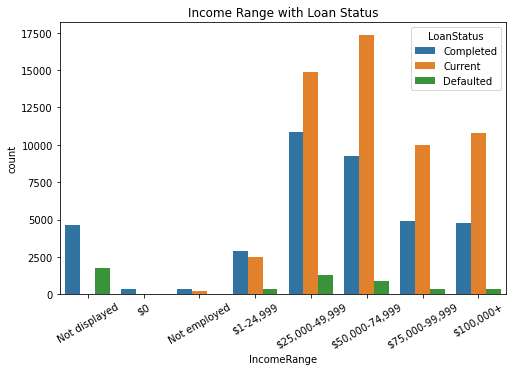

In [38]:
order_type = ['Not displayed','$0', 'Not employed','$1-24,999',
              '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
plt.figure(figsize=(8,5))
sb.countplot(x='IncomeRange', hue='LoanStatus', data=df_new, order=order_type)
plt.title("Income Range with Loan Status")
plt.xticks(rotation=30);

>* There doesn't seem to be that much interaction between displayed IncomeRange and Laon Status, but
>* With **Not Displayed** Income Range it's more likely to Defaulted a Loan. 

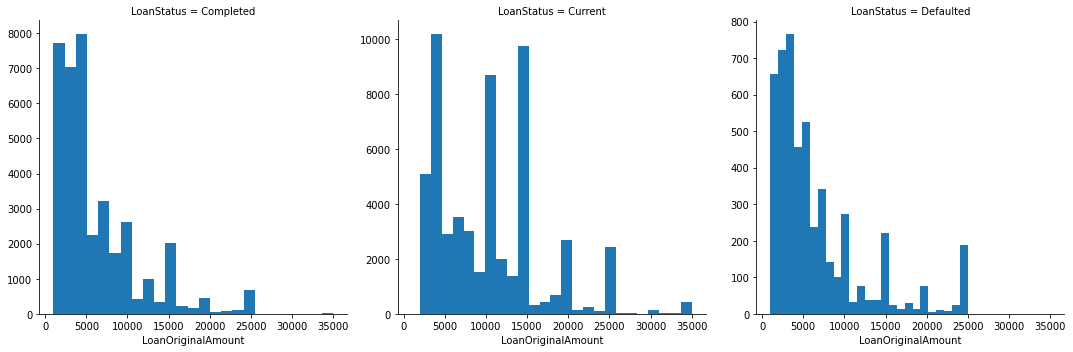

In [39]:
g = sb.FacetGrid(data=df_new, col='LoanStatus', sharey=False, height=5)
g.map(plt.hist, 'LoanOriginalAmount', bins = 25);

>* It looks like Loan Original Amount **does not** have significant relationships with Loan Status

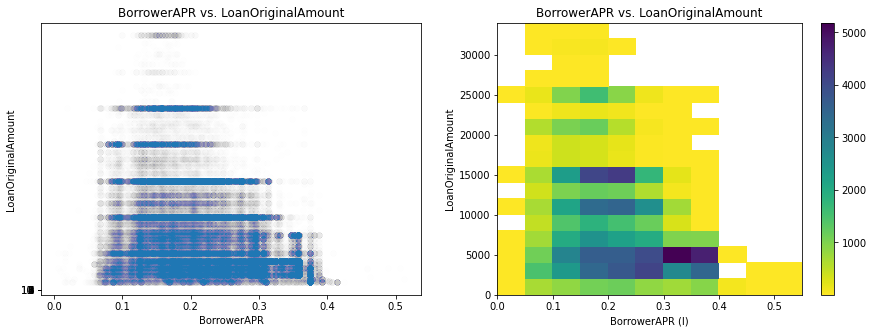

In [40]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df, x ='BorrowerAPR', y ='LoanOriginalAmount', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. LoanOriginalAmount')
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount ')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05)
bins_y = np.arange(0, df['LoanOriginalAmount'].max()+100, 2000)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'LoanOriginalAmount', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. LoanOriginalAmount')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('LoanOriginalAmount');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>**In this part of investigation I'm trying to look into the relashinships between if the borrower completed or defaulted a loan with other variables from the borrower's informations:**
>* I've checked the factors that can be associated with loan Status, so I've looked into the following variables(Term, BorrowerAPR, BorrowerRate, LenderYield, Occupation, listing category, Income Range, LoanOriginalAmount).
>* The Term of the Loan was slightly corrolated with the Loan Status since we could see that the highest percentage of Loan Defaulted was in the 3 years Term, with 12.36%.
>* BorrowerAPR, BorrowerRate, and LenderYield had a surprisingly high amount of correlation with the Loan Status, which we could see that Defaulted loans had a higher median than Completed ones.
>* There was also some important note, in income Range, borrowers who didn't displayed them Income range is more likey to Defaulted more than any income range.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>* BorrowerAPR, BorrowerRate, LenderYield, and ProsperScore are strongly correlated to one another. 
> I've checked the Loan Original Amount with BorrowerAPR, and it seams that when Loan Original Amount is high, the BorrowerAPR tend to be low. Going slowly in a curve. While Loan Original Amount decrease, BorrowerAPR increase.

## Multivariate Exploration

>* Let's take a look at the year column...

In [41]:
df.year.value_counts()

2013    33912
2012    19553
2014    11734
2008    11552
2007    11460
2011    11228
2006     5906
2010     5652
2009     2047
2005       22
Name: year, dtype: int64

>* I would consider 2005 as an Outlier because it has just 22 Loans, and this would be miss-leading to us!
>* There's a big drop in 2009. we should put this into consideration.

**Loan Status vs. Stated Monthly Income by Time...**

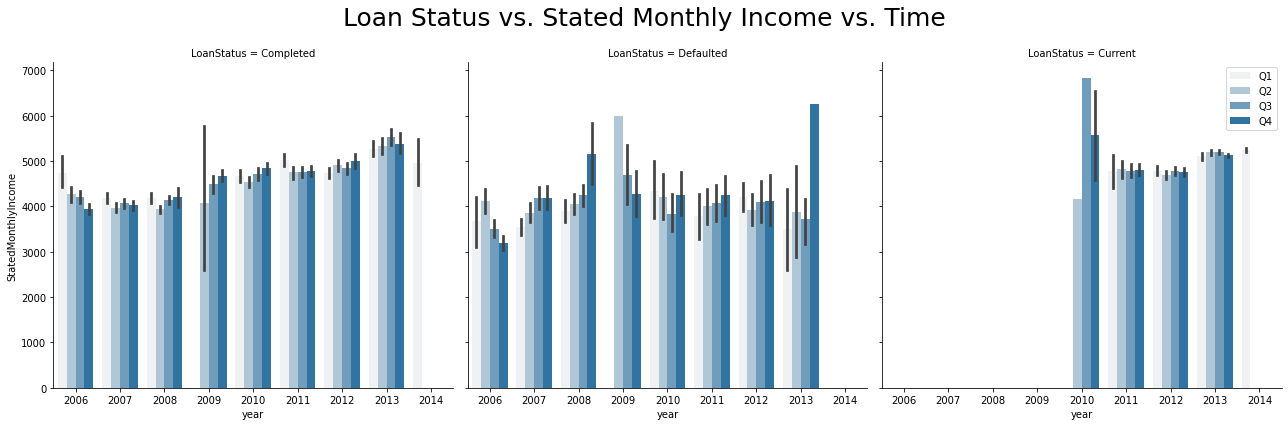

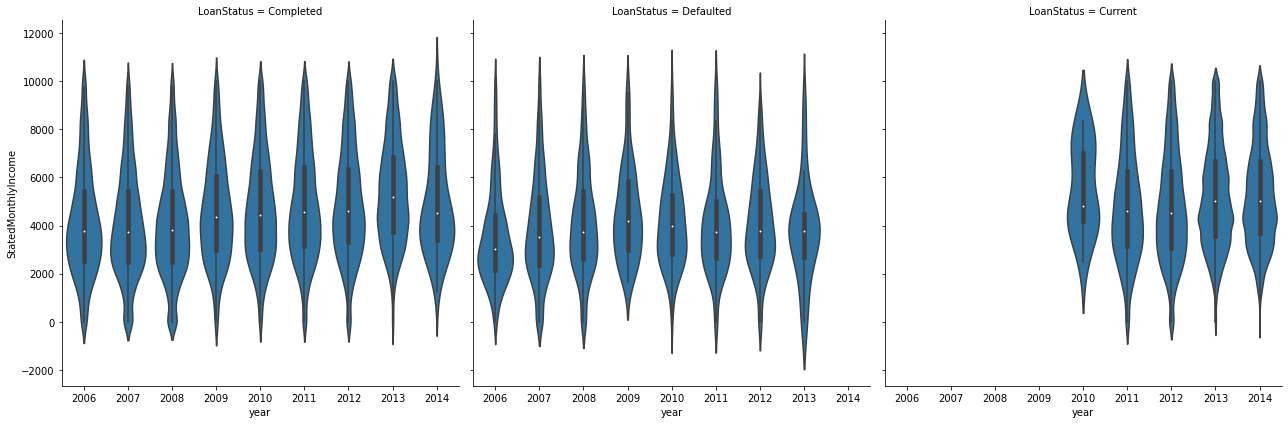

In [42]:
df_new = df[(df.LoanStatus.isin(['Current', 'Completed', 'Defaulted'])) & (df.StatedMonthlyIncome <= 10000) & (df.year != '2005')]

order_type = np.sort(df_new.year.unique())
order_hue = np.sort(df_new.Q.unique())
order_status = ['Completed', 'Defaulted', 'Current']

g = sb.FacetGrid(data = df_new, col = 'LoanStatus', col_order=order_status, height = 6,
                margin_titles = True)
g.map(sb.barplot, 'year', 'StatedMonthlyIncome', 'Q', hue_order=order_hue, order=order_type)
plt.legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Loan Status vs. Stated Monthly Income vs. Time", fontsize=25)
plt.show()

g = sb.FacetGrid(data = df_new, col = 'LoanStatus', col_order=order_status,  height = 6,
                margin_titles = True)
g.map(sb.violinplot, 'year', 'StatedMonthlyIncome', order=order_type);

>* We can see here that there's a slightly increasement in number of the Loan Completed, and decreasement in the number of the Loan Defaulted.
>* The year 2009 had a little data in the first and second quarter, 2014 had just Loans in the first quarter and they're all Completed Loans

**average loan amount for each Listing year vs loan status**
* It seems that loan amount is slighly related to the completed or default loans across the years.

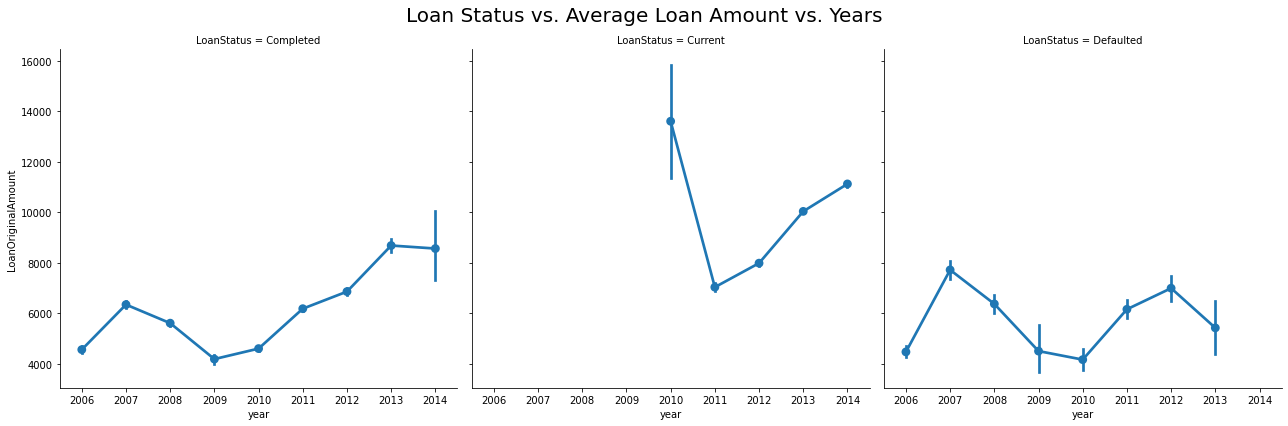

In [43]:
g = sb.FacetGrid(data = df_new, col = 'LoanStatus', height = 6,
                margin_titles = True)
g.map(sb.pointplot, 'year', 'LoanOriginalAmount',
      order=order_type)
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Loan Status vs. Average Loan Amount vs. Years", fontsize=20);

>* From the following plot, it's clear that Laon Original Amount increased slightly by time after the drop in 2009.
>* Interestingly, It looks like Loan Status has a relationship with Loan Original Amount throw the time.
>* The larger error bars on the plot are due to there being fewer Loans at the specific year grades at this Loan Amount.
>* As Loan Amount increase, the Loan seems more to get Completed and small one tend to be defaulted, but before is the whole oppisite.

**LoanOriginalAmount versus loanStatus and Term:**

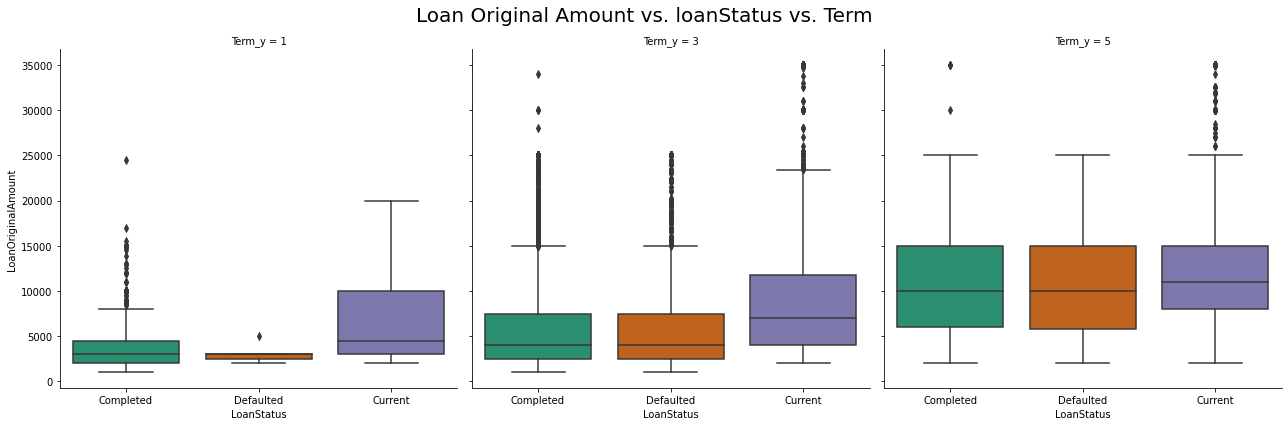

In [44]:
g = sb.FacetGrid(data= df_new, col= 'Term_y', height = 6,
                margin_titles= True)
g.map(sb.boxplot, 'LoanStatus', 'LoanOriginalAmount', palette='Dark2', order=['Completed', 'Defaulted', 'Current'])
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Loan Original Amount vs. loanStatus vs. Term", fontsize=20);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>* I extended my investigation of Loan Status against `Stated Monthly Income` and `Loan Original Amount` and by `Time` in this section by looking at the impact of the three categorical quality features.
>* The multivariate exploration here showed that there's a positive effect of increased in borrowers to complete with a high Stated Monthly Income by years.
>* It seems that the trend for different loan status is not the same across the years. so this can be used as a variable to get the profiles for defaulted and completed loans.
>* LoanOriginalAmount versus loanStatus and Term: For shorter loan 1 year term the Loan Status "Current" had the highest `Loan Original Amount`, Defaulted was the lowest. For 3 and 5 years Term, borrowers had a higher range of Loan amount, thought the longer term, the bigger amound of Loan.
>* Current borrowers seems to get lower Loan term than longer.

### Were there any interesting or surprising interactions between features?

>* Looking back on the hist plots, it doesn't seem like there's a systematic interaction effect between the three categorical features `["LoanOriginalAmount", "loanStatus", "Term"]`. However, the features also aren't fully independent.